# homework 2
author: marianne

In [92]:
import imageio.v2 as imageio
import numpy as np
import glob
import matplotlib.pyplot as plt

In [10]:
datadir = '/global/home/users/cowherd/cssltimeseries/a2-images/'
files = glob.glob(datadir + '*.png')

In [68]:
def find_best_alignment(im1, im2, vrange = 15, hrange = 15):
    hoff = np.inf
    voff = np.inf
    err = np.inf
    for vo in range(-vrange, vrange+1):
        im2tmp = np.roll(im2, vo, axis=1)
        for ho in range(-hrange, hrange+1):
            im2tmp = np.roll(im2tmp, ho, axis=0)
            errtmp = np.nansum((im1[:,:,1] - im2tmp[:,:,1]**2))
            if np.isinf(err): err = errtmp
            if errtmp <= err:
                hoff = ho
                voff = vo
            err = np.nanmin([err, errtmp])
    
    return hoff, voff, err

In [69]:
im1 = imageio.imread(files[0])
for i in range(1,len(files)):
    im2 = imageio.imread(files[i])
    hoff, voff, err = find_best_alignment(im1, im2, 15, 15)
    im2off = np.roll(np.roll(im2, hoff, axis=0), voff, axis=1)
    im1 = (im2off + im1)/2
imout = im1.astype(int)

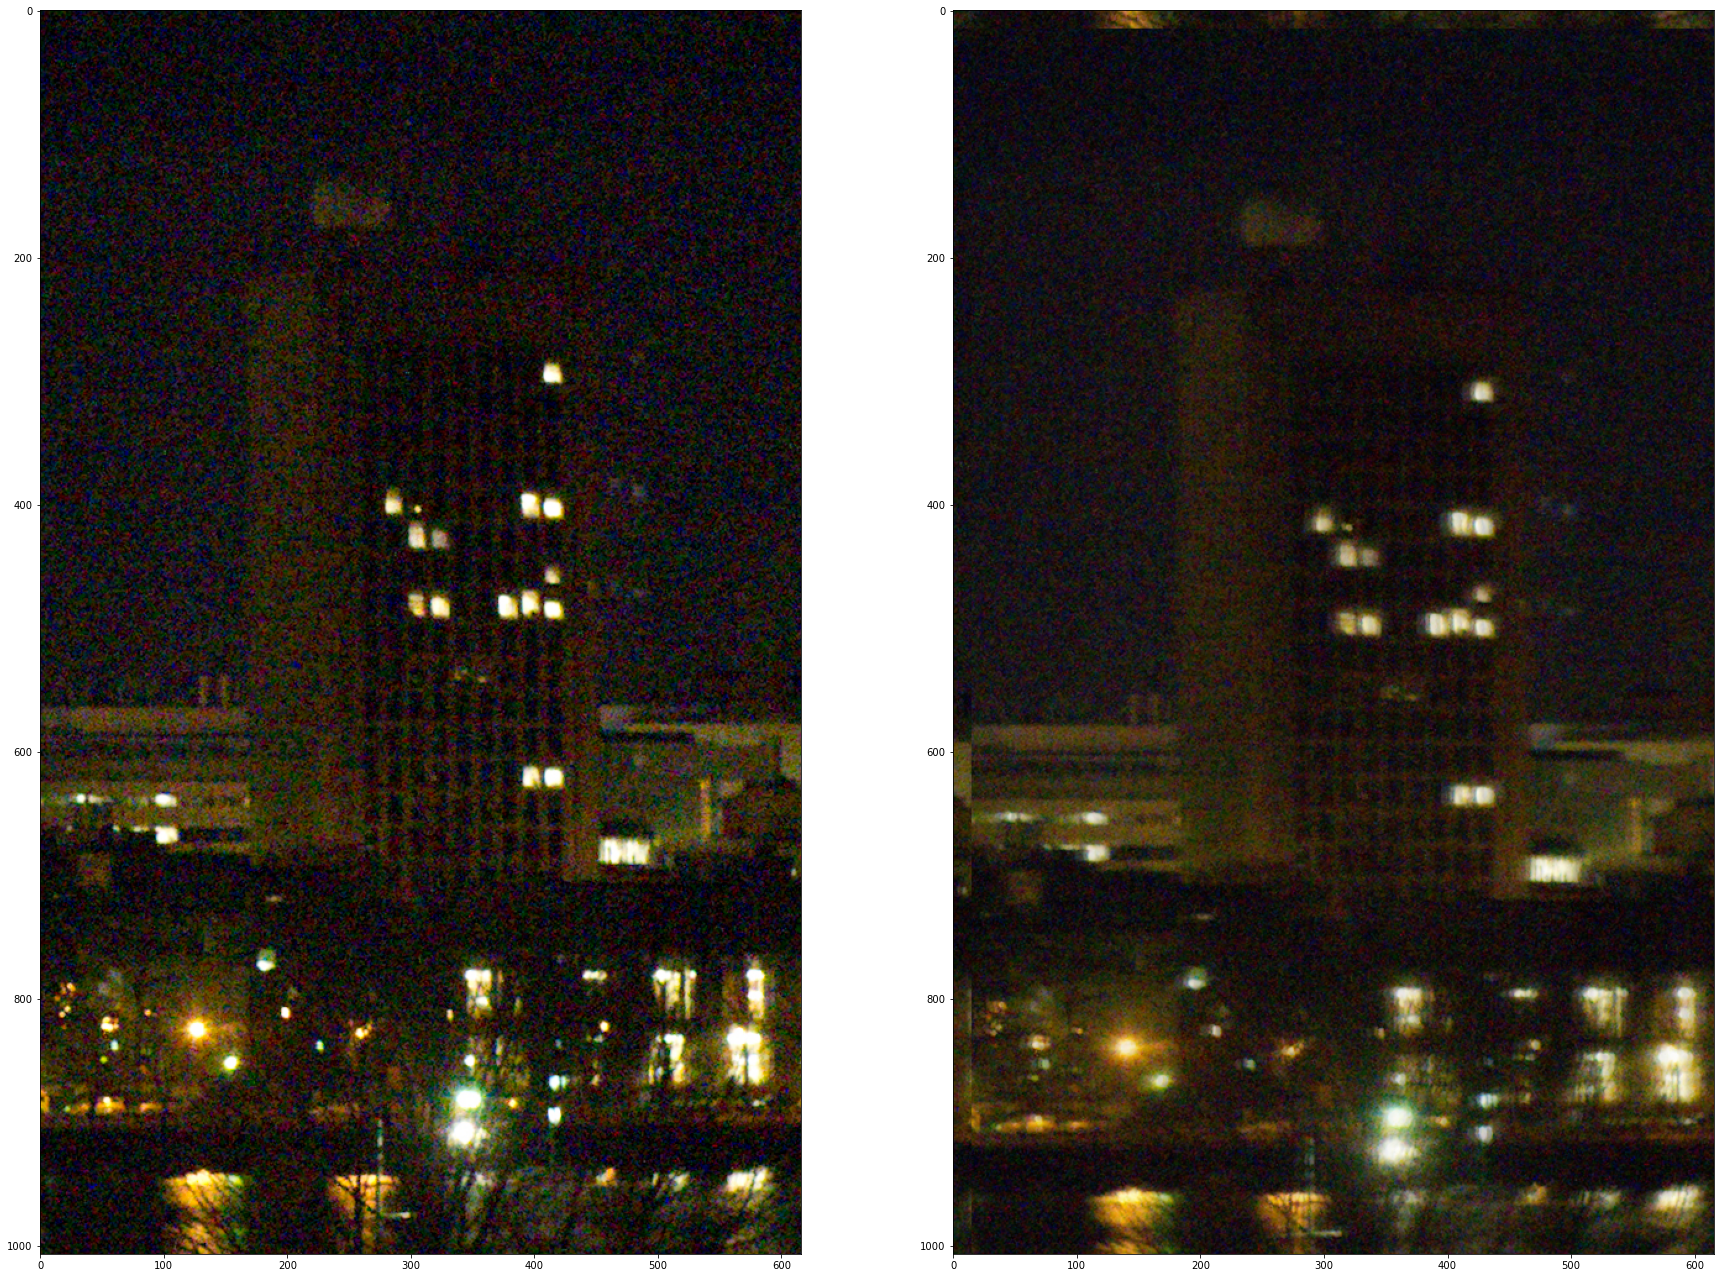

In [91]:
fig,ax=plt.subplots(1,2,figsize=(30,30))
ax[0].imshow(im2.astype(int))
ax[1].imshow(im1.astype(int))
plt.show()